In [1]:
# HW-3
# Finding adverb and adjective phrases, and computing basic statistics

# importing required nltk libraries
import nltk
from nltk import sent_tokenize

# In HW-1, I used books written by Shakespeare - Caesar and Hamlet. We will continue exploratory 
# sentiment analysis on the same books
nltk.corpus.gutenberg.fileids()

# Get Shakespeare books in the Gutenberh corpus
shakespeare_books = [book for book in nltk.corpus.gutenberg.fileids( ) \
                     if 'shakespeare' in book]

# Book-1: Caesar (Genre: Tragedy)
caesar = nltk.corpus.gutenberg.raw(shakespeare_books[0])

# Book-2: Hamlet (Genre: Tragedy/Comedy)
hamlet = nltk.corpus.gutenberg.raw(shakespeare_books[1])

print(caesar[:50])
print(hamlet[:50])

[The Tragedie of Julius Caesar by William Shakespe
[The Tragedie of Hamlet by William Shakespeare 159


In [2]:
# Separate the text into sentences first
caesar_sentences = nltk.sent_tokenize(caesar)
print(caesar_sentences[:10])

hamlet_sentences = nltk.sent_tokenize(hamlet)
print(hamlet_sentences[:10])

['[The Tragedie of Julius Caesar by William Shakespeare 1599]\n\n\nActus Primus.', 'Scoena Prima.', 'Enter Flauius, Murellus, and certaine Commoners ouer the Stage.', 'Flauius.', 'Hence: home you idle Creatures, get you home:\nIs this a Holiday?', 'What, know you not\n(Being Mechanicall) you ought not walke\nVpon a labouring day, without the signe\nOf your Profession?', 'Speake, what Trade art thou?', 'Car.', 'Why Sir, a Carpenter\n\n   Mur.', 'Where is thy Leather Apron, and thy Rule?']
['[The Tragedie of Hamlet by William Shakespeare 1599]\n\n\nActus Primus.', 'Scoena Prima.', 'Enter Barnardo and Francisco two Centinels.', 'Barnardo.', "Who's there?", 'Fran.', 'Nay answer me: Stand & vnfold\nyour selfe\n\n   Bar.', 'Long liue the King\n\n   Fran.', 'Barnardo?', 'Bar.']


In [3]:
from textblob import TextBlob

# Get polarity/subjectivity for each sent in both corpora
caesar_sentiment = [[sent, TextBlob(sent).sentiment] for sent in caesar_sentences[2:]]
print(caesar_sentiment[1:10])

hamlet_sentiment = [[sent, TextBlob(sent).sentiment] for sent in hamlet_sentences[2:]]
print(hamlet_sentiment[1:10])

# The raw data here is in the form of a list(we are using a list instead of 
# tuple so we have the flexibility to add items in future):
#. <sentence>, sentiment(polarity=<>, subjectivity=<>)
# Correspondingly, we will translate the sentiment range (-1, 0, 1) to follows:
#.  -1 -> 0 as Negative
#.  0 as Neutral
#.  0 -> 1 as Positive

# NOTE:
# This can be obtained from the sentence using the index 1 & accessing the
# polarity/subjectivity using object.polarity() or object.subjectivity().

# For example:
sent = caesar_sentiment[2][0]
polarity = caesar_sentiment[2][1].polarity
subjectivity = caesar_sentiment[2][1].subjectivity

print('Sentence %s has polarity %s and subjectivity %s' %(sent, polarity, subjectivity))

[['Flauius.', Sentiment(polarity=0.0, subjectivity=0.0)], ['Hence: home you idle Creatures, get you home:\nIs this a Holiday?', Sentiment(polarity=0.0, subjectivity=0.0)], ['What, know you not\n(Being Mechanicall) you ought not walke\nVpon a labouring day, without the signe\nOf your Profession?', Sentiment(polarity=0.0, subjectivity=0.0)], ['Speake, what Trade art thou?', Sentiment(polarity=0.0, subjectivity=0.0)], ['Car.', Sentiment(polarity=0.0, subjectivity=0.0)], ['Why Sir, a Carpenter\n\n   Mur.', Sentiment(polarity=0.0, subjectivity=0.0)], ['Where is thy Leather Apron, and thy Rule?', Sentiment(polarity=0.0, subjectivity=0.0)], ['What dost thou with thy best Apparrell on?', Sentiment(polarity=1.0, subjectivity=0.3)], ['You sir, what Trade are you?', Sentiment(polarity=0.0, subjectivity=0.0)]]
[['Barnardo.', Sentiment(polarity=0.0, subjectivity=0.0)], ["Who's there?", Sentiment(polarity=0.0, subjectivity=0.0)], ['Fran.', Sentiment(polarity=0.0, subjectivity=0.0)], ['Nay answer me:

In [4]:
# Next we will translate the polarity and subjectivity index to the tags we want to see.
import copy

def translate_sentiment(sent_blob):
    '''
    Given a sentence, derive its sentiment
    '''
    if sent_blob[1].polarity < 0:
        sent_blob.append('Negative')
    elif sent_blob[1].polarity == 0:
        sent_blob.append('Neutral')
    elif sent_blob[1].polarity > 0:
        sent_blob.append('Positive')
    return sent_blob

print(translate_sentiment(caesar_sentiment[2]))
print(translate_sentiment(hamlet_sentiment[2]))

['Hence: home you idle Creatures, get you home:\nIs this a Holiday?', Sentiment(polarity=0.0, subjectivity=0.0), 'Neutral']
["Who's there?", Sentiment(polarity=0.0, subjectivity=0.0), 'Neutral']


In [5]:
# Let's make a data-frame comprising all the above data
import pandas as pd

def create_df(textblob_raw):
    df = pd.DataFrame(columns=['Sentence', 'TextBlob-sentiment(raw)', 'Sentiment'])
    for blob in textblob_raw:
        new_blob = translate_sentiment(blob)
        row = {'Sentence': new_blob[0],
               'TextBlob-sentiment(raw)': new_blob[1],
               'Sentiment': new_blob[2]
        }
        df = df.append(row, ignore_index=True)
    return df

df_caesar = create_df(caesar_sentiment)
df_caesar.head()

,Sentence,TextBlob-sentiment(raw),Sentiment
0,"Enter Flauius, Murellus, and certaine Commoner...","(0.0, 0.0)",Neutral
1,Flauius.,"(0.0, 0.0)",Neutral
2,"Hence: home you idle Creatures, get you home:\...","(0.0, 0.0)",Neutral
3,"What, know you not\n(Being Mechanicall) you ou...","(0.0, 0.0)",Neutral
4,"Speake, what Trade art thou?","(0.0, 0.0)",Neutral


In [6]:
df_hamlet = create_df(hamlet_sentiment)
df_hamlet.head()

,Sentence,TextBlob-sentiment(raw),Sentiment
0,Enter Barnardo and Francisco two Centinels.,"(0.0, 0.0)",Neutral
1,Barnardo.,"(0.0, 0.0)",Neutral
2,Who's there?,"(0.0, 0.0)",Neutral
3,Fran.,"(0.0, 0.0)",Neutral
4,Nay answer me: Stand & vnfold\nyour selfe\n\n ...,"(0.0, 0.0)",Neutral


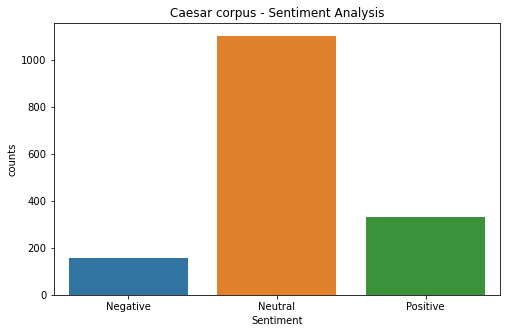

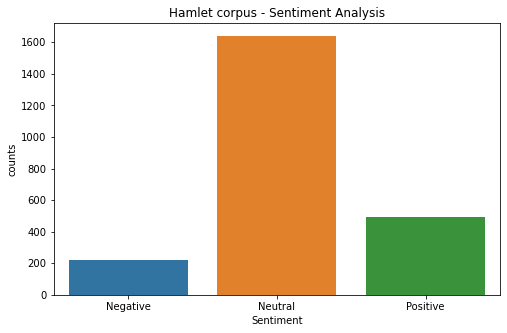

In [7]:
# Make a bar-plot of sentiment-counts across both the corpora

import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar_graph(corpus_name, label_groups):
    plt.figure(figsize=(8,5))
    ax = sns.barplot(x="Sentiment", y="counts", data=label_groups)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(label="%s" %corpus_name)
    plt.show()


caesar_labels = df_caesar.groupby('Sentiment').size().reset_index(name='counts')
plot_bar_graph('Caesar corpus - Sentiment Analysis', caesar_labels)

hamlet_labels = df_hamlet.groupby('Sentiment').size().reset_index(name='counts')
plot_bar_graph('Hamlet corpus - Sentiment Analysis', hamlet_labels)

In [8]:
# Also, write a csv with this data
df_summary = pd.DataFrame(columns=['Book', 'Negative', 'Neutral', 'Positive'])

df_summary = df_summary.append({'Book': 'Caesar',
                               'Negative': df_caesar.loc[0][1],
                               'Neutral': df_caesar.loc[1][1],
                               'Positive': df_caesar.loc[2][1]}, ignore_index=True)

df_summary = df_summary.append({'Book': 'Hamlet',
                               'Negative': df_hamlet.loc[0][1],
                               'Neutral': df_hamlet.loc[1][1],
                               'Positive': df_hamlet.loc[2][1]}, ignore_index=True)

df_summary.head()
df_summary.to_csv('new_data.csv', index=False)

# See sample output of the csv file:
# $ less new_data.csv 
# Book,Negative,Neutral,Positive
# Caesar,157,1101,332
# Hamlet,222,1640,491

In [9]:
# Starting the classification task

# Consolidate the data-frame and create a list with:
# [ (<sentence>, <sentiment)] structure

caesar_docs = []
# iterating over the dataset and extracting the information sought
for i in range(0, len(df_caesar['Sentiment'])):
    caesar_docs.append((df_caesar['Sentence'][i], df_caesar['Sentiment'][i]))

# Printing the output for validation
print(caesar_docs[0])

# Repeating the above for hamlet too
hamlet_docs = []
# iterating over the dataset and extracting the information sought
for i in range(0, len(df_hamlet['Sentiment'])):
    hamlet_docs.append((df_hamlet['Sentence'][i], df_hamlet['Sentiment'][i]))

# Printing the output for validation
hamlet_docs[0]

('Enter Flauius, Murellus, and certaine Commoners ouer the Stage.', 'Neutral')


('Enter Barnardo and Francisco two Centinels.', 'Neutral')

In [10]:
# Defining set of words that will be used for features
import re

# We'll find the 2000 most common words and used them as an important feature of the whole corpus
def unigram_freq(docs):
    all_words = []
    # Write a regex to pull only the word portion & leave 
    # out any punctuation marks etc.
    for (sentence, category) in docs:
        for word in sentence.split():
            try:
                all_words.append(re.findall(r'\w+', word)[0])
            except IndexError:
                pass
    top_words = nltk.FreqDist(all_words)
    most_common_words = top_words.most_common(2000)
    word_features = [word for (word,count) in most_common_words]
    return all_words, word_features

caesar_all_words, caesar_word_features = unigram_freq(caesar_docs)
hamlet_all_words, hamlet_word_features = unigram_freq(hamlet_docs)

# Examine some word-features:
print(caesar_word_features[:10])

['I', 'the', 'and', 'to', 'you', 'of', 'not', 'a', 'is', 'And']


In [11]:
# now we will use that list of most frequent words in the entire corpus
# to iterate over each sentence and check if any of those words are present
# in that way, we will see if this unigram corpus feature is present on that particular sentence
# using Boolean logic that matches values and returns 'True' or 'False'
# we do this by defining a Python "function," i.e.a piece of code writen to be reused
def document_features(document, word_features):
    document_words = set(document)
    #we open a Pytnon dictionary instead of a list
    features = {}
    for word in word_features:
        #checking if the word from word_features matches a word in the document
        features['contains({})'.format(word)] = (word in document_words)
    return features

caesar_featuresets = [(document_features(d, caesar_word_features), c) for (d, c) in caesar_docs]
hamlet_featuresets = [(document_features(d, hamlet_word_features), c) for (d, c) in hamlet_docs]


print("Length of feature set for Caesar = %d" %len(caesar_featuresets))
print("Length of feature set for Hamlet = %d" %len(hamlet_featuresets))

Length of feature set for Caesar = 1590
Length of feature set for Hamlet = 2353


In [39]:
print(caesar_featuresets[0])

({'contains(I)': False, 'contains(the)': False, 'contains(and)': False, 'contains(to)': False, 'contains(you)': False, 'contains(of)': False, 'contains(not)': False, 'contains(a)': True, 'contains(is)': False, 'contains(And)': False, 'contains(in)': False, 'contains(that)': False, 'contains(my)': False, 'contains(Caesar)': False, 'contains(me)': False, 'contains(it)': False, 'contains(him)': False, 'contains(Brutus)': False, 'contains(Bru)': False, 'contains(his)': False, 'contains(this)': False, 'contains(your)': False, 'contains(be)': False, 'contains(with)': False, 'contains(he)': False, 'contains(will)': False, 'contains(haue)': False, 'contains(for)': False, 'contains(do)': False, 'contains(so)': False, 'contains(shall)': False, 'contains(Cassi)': False, 'contains(thou)': False, 'contains(as)': False, 'contains(are)': False, 'contains(all)': False, 'contains(That)': False, 'contains(Cassius)': False, 'contains(we)': False, 'contains(by)': False, 'contains(then)': False, 'contains(

In [1]:
# Using k-folds = 5 we will fairly randomize the train & test data

import numpy as np
from sklearn.model_selection import KFold

def ml_nb(featuresets):
    kf = KFold(n_splits = 8)
    sum = 0

    for train, test in kf.split(featuresets):
        train_data = np.array(featuresets)[train]
        test_data = np.array(featuresets)[test]
        classifier = nltk.NaiveBayesClassifier.train(train_data)
        sum += nltk.classify.accuracy(classifier, test_data)
        
        

    #storing the score in a variable 
    acc1 = sum/5
    
    return  classifier, acc1

_, caesar_acc = ml_nb(caesar_featuresets)
_, hamlet_acc = ml_nb(hamlet_featuresets)

print('Accuracy for unigram feature-sets on Caesar corpus %s' %caesar_acc)
print('Accuracy for unigram feature-sets on Hamlet corpus %s' %hamlet_acc)

NameError: name 'caesar_featuresets' is not defined

In [13]:
# Since the accuracy is low, let's also try this with a 
# bi-gram featureset

# Re-using the code to clean-up
from nltk.collocations import *
import re

def bigram_freq(all_words):
    #data cleaning and preprocessing
    stopwords = nltk.corpus.stopwords.words('english')

    #creating bigrams features for the corpus and applying cleaning steps
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(all_words)
    finder.apply_word_filter(lambda w: w in stopwords)
    scored = finder.score_ngrams(bigram_measures.raw_freq)
    
    #extracting clean bigrams (no frequency information)
    bigram_features = [bigram for (bigram, count) in scored[:2000]]
    
    return bigram_features


caesar_word_bi_features = bigram_freq(caesar_all_words)
hamlet_word_bi_features = bigram_freq(hamlet_all_words)  

# Examine a few bigram high-freq words
print(caesar_word_bi_features[-5:])
print(hamlet_word_bi_features[-5:])

[('Ghost', 'I'), ('Ghost', 'Messa'), ('Ghost', 'Thy'), ('Ghost', 'To'), ('Ghosts', 'Why')]
[('Ham', 'Rest'), ('Ham', 'Safely'), ('Ham', 'Saw'), ('Ham', 'Seemes'), ('Ham', 'Slanders')]


In [14]:
def bi_document_features(document, bigram_features):
    document_words = list(nltk.bigrams(document))
    features = {}
    for word in bigram_features:
        #boolean logic will return 'True' if there is a match, or 'False' if not
        features['contains({})'.format(word)] = (word in document_words)
    return features

# applying the function to our documents
caesar_featuresets2 = [(bi_document_features(d, caesar_word_bi_features), c) for (d, c) in caesar_docs]
hamlet_featuresets2 = [(bi_document_features(d, hamlet_word_bi_features), c) for (d, c) in hamlet_docs]

In [40]:
print("Length of feature set (bigram) for Caesar = %d" %len(caesar_featuresets2))
print("Length of feature set (bigram) for Hamlet = %d" %len(hamlet_featuresets2))
print(caesar_featuresets2[0])

Length of feature set (bigram) for Caesar = 1590
Length of feature set (bigram) for Hamlet = 2353
({"contains(('I', 'haue'))": False, "contains(('I', 'know'))": False, "contains(('Cassi', 'I'))": False, "contains(('I', 'shall'))": False, "contains(('Bru', 'I'))": False, "contains(('Mark', 'Antony'))": False, "contains(('let', 'vs'))": False, "contains(('Marke', 'Antony'))": False, "contains(('And', 'I'))": False, "contains(('Lord', 'Bru'))": False, "contains(('I', 'feare'))": False, "contains(('Caesar', 'Caes'))": False, "contains(('Enter', 'Brutus'))": False, "contains(('For', 'I'))": False, "contains(('Noble', 'Brutus'))": False, "contains(('Bru', 'O'))": False, "contains(('I', 'may'))": False, "contains(('You', 'shall'))": False, "contains(('haue', 'done'))": False, "contains(('thou', 'art'))": False, "contains(('Antony', 'Ant'))": False, "contains(('Caesar', 'And'))": False, "contains(('Caesar', 'I'))": False, "contains(('Enter', 'Lucius'))": False, "contains(('I', 'say'))": False,

In [16]:
# Check the accuracy via the k-folds method
caesar_classifier2, caesar_acc2 = ml_nb(caesar_featuresets2)
hamlet_classifier2, hamlet_acc2 = ml_nb(hamlet_featuresets2)

print('Accuracy for bigram feature-sets on Caesar corpus %s' %caesar_acc2)
print('Accuracy for bigram feature-sets on Hamlet corpus %s' %hamlet_acc2)

# NOTE:
# Save the corresponding classifier object since we have better results ~70% 
# for both corpura

Accuracy for bigram feature-sets on Caesar corpus 0.6924528301886792
Accuracy for bigram feature-sets on Hamlet corpus 0.6969941726521209


In [38]:
# Write classifier predictions to a csv
# Form a test_data with bottom 20% of sentences

def create_predictions_csv(book_name, classifer, book_sentences, bi_features):
    test_len = int(0.2 * len(book_sentences))
    sentences = book_sentences[-test_len:]

    df_predict = pd.DataFrame(columns=['Sentence', 'Book', 'pos-sent', 'neg-sent', 'neutral-sent'])

    for sents in sentences:
        senti = caesar_classifier2.classify(bi_document_features(nltk.word_tokenize(sents), bi_features))
        #adding items to the counter as they are classified
        if senti.lower() == 'positive':
            df_predict = df_predict.append({'Sentence': sents,
                                            'Book': book_name, 
                                            'pos-sent': 1,
                                            'neg-sent': 0,
                                            'neutral-sent': 0}, ignore_index=True)

        elif senti.lower() == 'negative':
            df_predict = df_predict.append({'Sentence': sents,
                                            'Book': book_name,
                                            'pos-sent': 0,
                                            'neg-sent': 1,
                                            'neutral-sent': 0}, ignore_index=True)

        else:
            df_predict = df_predict.append({'Sentence': sents,
                                            'Book': book_name,
                                            'pos-sent': 0,
                                            'neg-sent': 0,
                                            'neutral-sent': 1}, ignore_index=True)

    df_predict.to_csv('predictions.csv', index=False, mode='a')
    print(df_predict.head())

print('----Caesar predictions ----')
create_predictions_csv('Caesar', caesar_classifier2, caesar_sentences, 
                       caesar_word_bi_features) 
print('----Hamlet predictions ----')
create_predictions_csv('Hamlet', hamlet_classifier2, hamlet_sentences, 
                       hamlet_word_bi_features) 

----Caesar predictions ----
                                            Sentence    Book pos-sent  \
0  Layest thou thy Leaden Mace vpon my Boy,\nThat...  Caesar        0   
1  Gentle knaue good night:\nI will not do thee s...  Caesar        0   
2  Let me see, let me see; is not the Leafe turn'...  Caesar        0   
3                              Heere it is I thinke.  Caesar        0   
4                         Enter the Ghost of Caesar.  Caesar        0   

  neg-sent neutral-sent  
0        1            0  
1        1            0  
2        1            0  
3        1            0  
4        0            1  
----Hamlet predictions ----
                                            Sentence    Book pos-sent  \
0  So that with ease,\nOr with a little shuffling...  Hamlet        0   
1                                      I will doo't.  Hamlet        0   
2  And for that purpose Ile annoint my Sword:\nI ...  Hamlet        0   
3  Let's further thinke of this,\nWeigh what conu...  Ham

In [37]:
# Next, let's analyze the top-50 adjective phrases, adverb phrases
# & verb phrases in both the positive and negative sentences.

caesar_sent_pos = []
caesar_sent_neg = []
caesar_sent_neu = []

for sent, Sentiment in caesar_docs:
    if Sentiment == 'Positive':
        caesar_sent_pos.append(sent)
    elif Sentiment == 'Negative':
        caesar_sent_neg.append(sent)
    elif Sentiment == 'Neutral':
        caesar_sent_neu.append(sent)


# Walk the positive/negative sentences and word tokenize it, before running
# it through the pos_tag()
caesar_tokens_pos = [nltk.word_tokenize(sent) for sent in caesar_sent_pos]
caesar_tags_pos = [nltk.pos_tag(token) for token in caesar_tokens_pos]

caesar_tokens_neg = [nltk.word_tokenize(sent) for sent in caesar_sent_neg]
caesar_tags_neg = [nltk.pos_tag(token) for token in caesar_tokens_neg] 

In [ ]:
# Utilizing code from HW-2, we will now call the same functions for 
# the analytics 

def top_tokens(taggedtext, pos_list):
    _tokens = []
    _words = []
    for sentence in taggedtext:
        for word, pos in sentence:
            if pos in pos_list: 
                if len(word)>1:
                    _tokens.append(word)
    freq_pos = nltk.FreqDist(_tokens)

    for word, freq in freq_pos.most_common(50):
        print(word,freq)
        _words.append(word)
    return(_words)
        
# Stats for Caesar data:
# Top 50 adjective tokens
print('Top 50 Adjective tokens (positive):')
adj_pos = top_tokens(caesar_tags_pos, ['JJ', 'JJR', 'JJS'])

print('Top 50 Adjective tokens (negative):')
adj_neg = top_tokens(caesar_tags_neg, ['JJ', 'JJR', 'JJS'])

# Top 50 adverb tokens
print('Top 50 Adverb tokens (positive):')
adv_pos = top_tokens(caesar_tags_pos, ['RB', 'RBR', 'RBS'])

print('Top 50 Adverb tokens (negative):')
adv_neg = top_tokens(caesar_tags_neg, ['RB', 'RBR', 'RBS'])

print('Top 50 Noun tokens: (positive)')
noun_pos = top_tokens(caesar_tags_pos, ['NN', 'NNS', 'NNP', 'NNPS']) #Noun, Noun-plural, Noun-Proper, Noun-Proper-plural
print('Top 50 Noun tokens: (negative)')
noun_neg = top_tokens(caesar_tags_neg, ['NN', 'NNS', 'NNP', 'NNPS'])


print('\nTop 50 Verb tokens: (positive)')
ver_pos = top_tokens(caesar_tags_pos, ['VB', 'VBD', 'VBG', 'VBP', 'VBZ']) # Verb, Verb-past-tense, Verb-present participle,
                                                              # Verb-past participle, singular present (non-3rd)
                                                              # singular present (3rd)
print('Top 50 Verb tokens: (negative)')
ver_neg = top_tokens(caesar_tags_neg, ['VB', 'VBD', 'VBG', 'VBP', 'VBZ'])

In [ ]:
hamlet_sent_pos = []
hamlet_sent_neg = []
hamlet_sent_neu = []

for sent, Sentiment in hamlet_docs:
    if Sentiment == 'Positive':
        hamlet_sent_pos.append(sent)
    elif Sentiment == 'Negative':
        hamlet_sent_neg.append(sent)
    elif Sentiment == 'Neutral':
        hamlet_sent_neu.append(sent)


# Walk the positive/negative sentences and word tokenize it, before running
# it through the pos_tag()
hamlet_tokens_pos = [nltk.word_tokenize(sent) for sent in hamlet_sent_pos]
hamlet_tags_pos = [nltk.pos_tag(token) for token in hamlet_tokens_pos]

hamlet_tokens_neg = [nltk.word_tokenize(sent) for sent in hamlet_sent_neg]
hamlet_tags_neg = [nltk.pos_tag(token) for token in hamlet_tokens_neg] 

In [ ]:
# Stats for Hamlet data:
# Top 50 adjective tokens
print('Top 50 Adjective tokens (positive):')
h_adj_pos = top_tokens(hamlet_tags_pos, ['JJ', 'JJR', 'JJS'])

print('Top 50 Adjective tokens (negative):')
h_adj_neg = top_tokens(hamlet_tags_neg, ['JJ', 'JJR', 'JJS'])

# Top 50 adverb tokens
print('Top 50 Adverb tokens (positive):')
h_adv_pos = top_tokens(hamlet_tags_pos, ['RB', 'RBR', 'RBS'])

print('Top 50 Adverb tokens (negative):')
h_adv_neg = top_tokens(hamlet_tags_neg, ['RB', 'RBR', 'RBS'])

print('Top 50 Noun tokens: (positive)')
h_noun_pos = top_tokens(hamlet_tags_pos, ['NN', 'NNS', 'NNP', 'NNPS']) #Noun, Noun-plural, Noun-Proper, Noun-Proper-plural
print('Top 50 Noun tokens: (negative)')
h_noun_neg = top_tokens(hamlet_tags_neg, ['NN', 'NNS', 'NNP', 'NNPS'])


print('\nTop 50 Verb tokens: (positive)')
h_verb_pos = top_tokens(hamlet_tags_pos, ['VB', 'VBD', 'VBG', 'VBP', 'VBZ']) # Verb, Verb-past-tense, Verb-present participle,
                                                              # Verb-past participle, singular present (non-3rd)
                                                              # singular present (3rd)
print('Top 50 Verb tokens: (negative)')
h_verb_neg = top_tokens(hamlet_tags_neg, ['VB', 'VBD', 'VBG', 'VBP', 'VBZ'])

In [ ]:
print(set(adj_pos) - set(h_adj_pos))
print(set(adj_neg) - set(h_adj_neg))
print(set(h_adj_neg) - set(adj_neg))
print(set(noun_pos) - set(h_noun_pos))
print(set(h_noun_pos) - set(noun_pos))
print(set(h_verb_neg) - set(ver_neg))
print(set(ver_neg) - set(h_verb_neg))